In [2]:
import pandas as pd

In [122]:
data=pd.read_csv("car data.csv")

In [4]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
data["Fuel_Type"]=pd.factorize(data["Fuel_Type"])[0]

In [6]:
data["Seller_Type"]=pd.factorize(data["Seller_Type"])[0]

In [7]:
data["Transmission"]=pd.factorize(data["Transmission"])[0]

In [8]:
corr=data.corr()

In [10]:
corr.sort_values(["Selling_Price"],ascending=False,inplace=True)

In [14]:
corr.Selling_Price

Selling_Price    1.000000
Present_Price    0.878983
Fuel_Type        0.509467
Transmission     0.367128
Year             0.236141
Kms_Driven       0.029187
Owner           -0.088344
Seller_Type     -0.550724
Name: Selling_Price, dtype: float64

In [21]:
col=["Car_Name","Transmission","Year","Kms_Driven","Owner","Seller_Type","Selling_Price"]

In [22]:
data_clean=data.drop(col,axis=1)

In [24]:
y=data["Selling_Price"]

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data_clean,y,test_size=0.09,random_state=10)

In [35]:
from sklearn.linear_model import LinearRegression
l=LinearRegression(n_jobs=4)

In [36]:
l.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=False)

In [37]:
l.score(X_test,y_test)

0.8233358007804986

In [81]:
from sklearn.ensemble import RandomForestRegressor


In [110]:
r=RandomForestRegressor(n_estimators=21
                        ,n_jobs=2,random_state=10)


In [111]:
r.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=21, n_jobs=2,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [112]:
r.score(X_test,y_test)

0.872658018017414

In [94]:
r.predict(X_test)

array([ 9.44373571,  0.70332937,  2.91698748,  0.5777415 ,  4.18214286,
        6.26832766, 20.8234127 ,  0.1484127 ,  0.50369841,  4.0172619 ,
        0.52318027, 10.56698413,  4.3325    ,  0.5777415 ,  4.48174603,
        5.26087302,  4.85714286,  0.32262585,  2.91698748,  6.11505872,
        0.5777415 ,  4.55414777,  6.22936508, 20.8234127 ,  0.24019841,
        0.47123016,  0.45287698,  0.1484127 ])

In [113]:
import matplotlib.pyplot as plt

In [117]:
import seaborn as sns


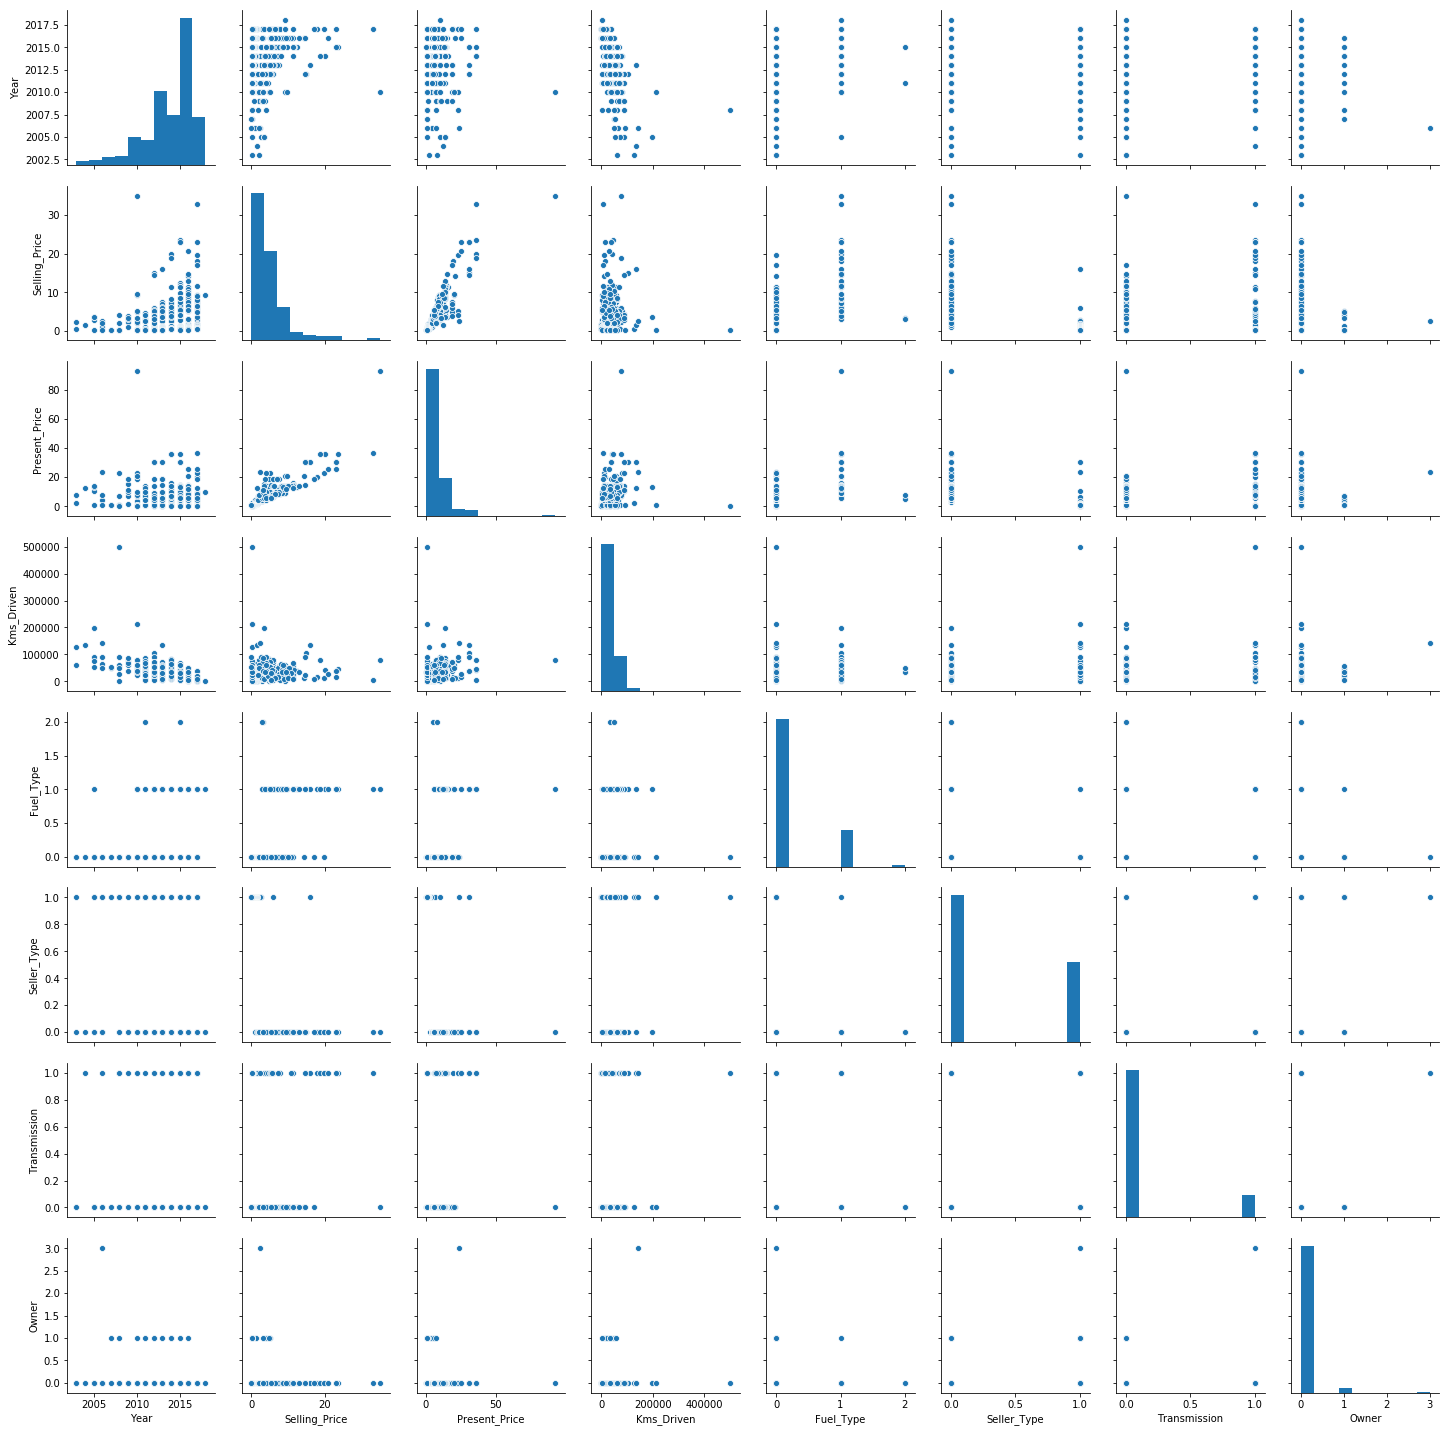

In [118]:
sns.pairplot(data)


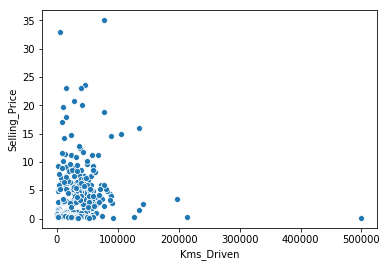

In [119]:
sns.scatterplot(x='Kms_Driven',y='Selling_Price',data=data)

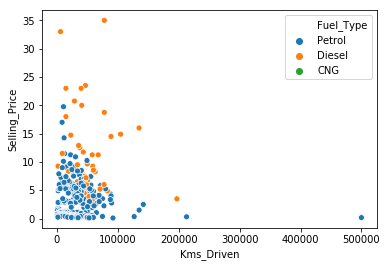

In [123]:
sns.scatterplot(x='Kms_Driven',y='Selling_Price',data=data,hue="Fuel_Type")

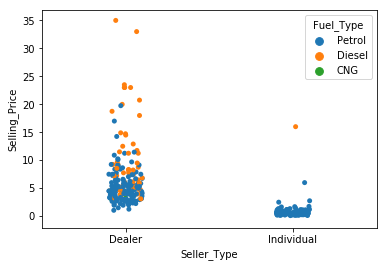

In [128]:
sns.stripplot(x='Seller_Type',y='Selling_Price',data=data,hue="Fuel_Type")
plt.show()

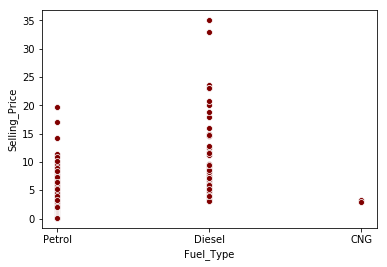

In [134]:
sns.scatterplot(x='Fuel_Type',y='Selling_Price',data=data,color="maroon")

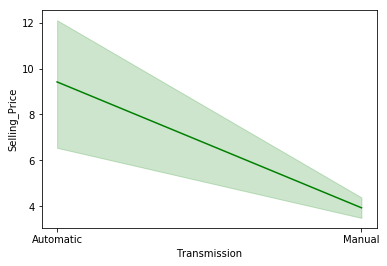

In [138]:
sns.lineplot(x='Transmission',y='Selling_Price',data=data,color="green")